In [1]:
from requests_html import HTMLSession
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import seaborn as sns

In [2]:
#EJERCICIO 1
#obtengo las urls y abro la sesion
url1 = "https://arxiv.org/list/stat.ML/recent"
url2 = "https://arxiv.org/abs/1912.02803"
with HTMLSession() as sess:
    r = sess.get(url1)
    s = sess.get(url2)
r

<Response [200]>

In [3]:
#busco la informacion en su url corrspondiente
divpage1 = r.html.find("div[id='dlpage']", first=True)
divpage2 = s.html.find("blockquote[class='abstract mathjax']", first=True).text
divpage2

'Abstract: Neural Tangents is a library designed to enable research into infinite-width neural networks. It provides a high-level API for specifying complex and hierarchical neural network architectures. These networks can then be trained and evaluated either at finite-width as usual or in their infinite-width limit. Infinite-width networks can be trained analytically using exact Bayesian inference or using gradient descent via the Neural Tangent Kernel. Additionally, Neural Tangents provides tools to study gradient descent training dynamics of wide but finite networks in either function space or weight space.\nThe entire library runs out-of-the-box on CPU, GPU, or TPU. All computations can be automatically distributed over multiple accelerators with near-linear scaling in the number of devices. Neural Tangents is available at this http URL. We also provide an accompanying interactive Colab notebook.'

In [4]:
#encuentro los dt y dd
papers_links = divpage1.find("dt")
papers_titles = divpage1.find("dd")

In [5]:
#aplico un for para ir obtenienod la infromacion
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    abstract = sess.get(abstract_url).html.find("blockquote[class='abstract mathjax']", first=True).text
    date = sess.get(abstract_url).html.find("div[class='dateline']", first=True).text
    
    values.append([title, abstract_url, abstract, date])

In [6]:
df_values = pd.DataFrame(values, columns=["title", "url", "abstract", "submitted"])
df_values.head()

,title,url,abstract,submitted
0,Title: Gaussian Process Priors for View-Aware ...,https://arxiv.org/abs/1912.03249,Abstract: We derive a principled framework for...,(Submitted on 6 Dec 2019)
1,Title: Non-asymptotic error bounds for scaled ...,https://arxiv.org/abs/1912.03154,Abstract: Recent works have derived non-asympt...,(Submitted on 6 Dec 2019)
2,Title: Solving Bernoulli Rank-One Bandits with...,https://arxiv.org/abs/1912.03074,Abstract: Stochastic Rank-One Bandits (Katarya...,(Submitted on 6 Dec 2019)
3,Title: Recent advances in deep learning applie...,https://arxiv.org/abs/1912.03280,Abstract: Skin cancer is a major public health...,(Submitted on 6 Dec 2019)
4,Title: Preserving Causal Constraints in Counte...,https://arxiv.org/abs/1912.03277,Abstract: Explaining the output of a complex m...,(Submitted on 6 Dec 2019)


In [7]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
%config InlineBackend.figure_format = "retina"

In [9]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query" #siempre que diga/query me piden mi llave
# Cargamos el API Key de Alpha Vantage (es personal)
avkey = "G871A3R3IT0HNMTG"  #pongo aqui mi API

In [10]:
#EJERCICIO 2
#defino las monedas y un for para poder obtener la info
monedas = ["MXN", "EUR", "BRL", "ARS", "CHF"]
tc =[]
for i in monedas:
    intraday1 = {    #si quiero descargar el fx intradia
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol": i,
        "apikey": avkey,
        "datatype": "csv",
        "outputsize":"full"
        }
    r=requests.get(base_url, params=intraday1)
    tc.append(pd.read_csv(r.url)[["timestamp", "close"]])
    sleep(30)
m =tc[0].rename({"close":"MXN"}, axis=1).set_index("timestamp")
e=tc[1].rename({"close":"EUR"}, axis=1).set_index("timestamp")
b=tc[2].rename({"close":"BRL"}, axis=1).set_index("timestamp")
a=tc[3].rename({"close":"ARS"}, axis=1).set_index("timestamp")
c=tc[4].rename({"close":"CHF"}, axis=1).set_index("timestamp")

In [11]:
#hago merge sobre timestamp
monedas = pd.merge((pd.merge((pd.merge(
                    (pd.merge(m, e, on= "timestamp", how ="inner")),
                    b, on= "timestamp", how ="inner")),
                      a, on= "timestamp", how ="inner")),
                       c, on= "timestamp", how ="inner")
monedas

,MXN,EUR,BRL,ARS,CHF
timestamp,,,,,
2019-12-09,0.0519,1.1057,0.2409,0.0162,1.0089
2019-12-08,0.0518,1.1058,0.2409,0.0162,1.0094
2019-12-06,0.0518,1.1056,0.2409,0.0162,1.0089
2019-12-05,0.0515,1.1104,0.2386,0.0162,1.0124
2019-12-04,0.0514,1.1078,0.2371,0.0162,1.0112
2019-12-03,0.0511,1.1082,0.2372,0.0162,1.0129
2019-12-02,0.0511,1.1076,0.2362,0.0162,1.0083
2019-12-01,0.0512,1.1021,0.2355,0.0162,0.9998
2019-11-29,0.0511,1.1017,0.2360,0.0162,0.9989


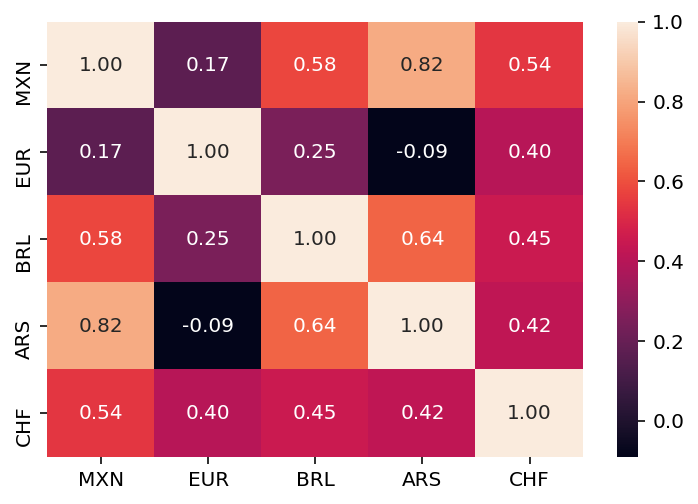

In [12]:
#EJERCICIO 3
#aplico mapa de calor sobre correlaciones
import seaborn as sns
sns.heatmap(monedas.corr(), annot=True, fmt=",.2f")

In [13]:
#EJERCICIO 4
#aplico correlacion con ventan de 30 dias
correlacion = monedas.rolling(window=30,center=True).corr(monedas["MXN"])
correlacion

,MXN,EUR,BRL,ARS,CHF
timestamp,,,,,
2019-12-09,NaN,NaN,NaN,NaN,NaN
2019-12-08,NaN,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN,NaN
2019-12-05,NaN,NaN,NaN,NaN,NaN
2019-12-04,NaN,NaN,NaN,NaN,NaN
2019-12-03,NaN,NaN,NaN,NaN,NaN
2019-12-02,NaN,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN,NaN


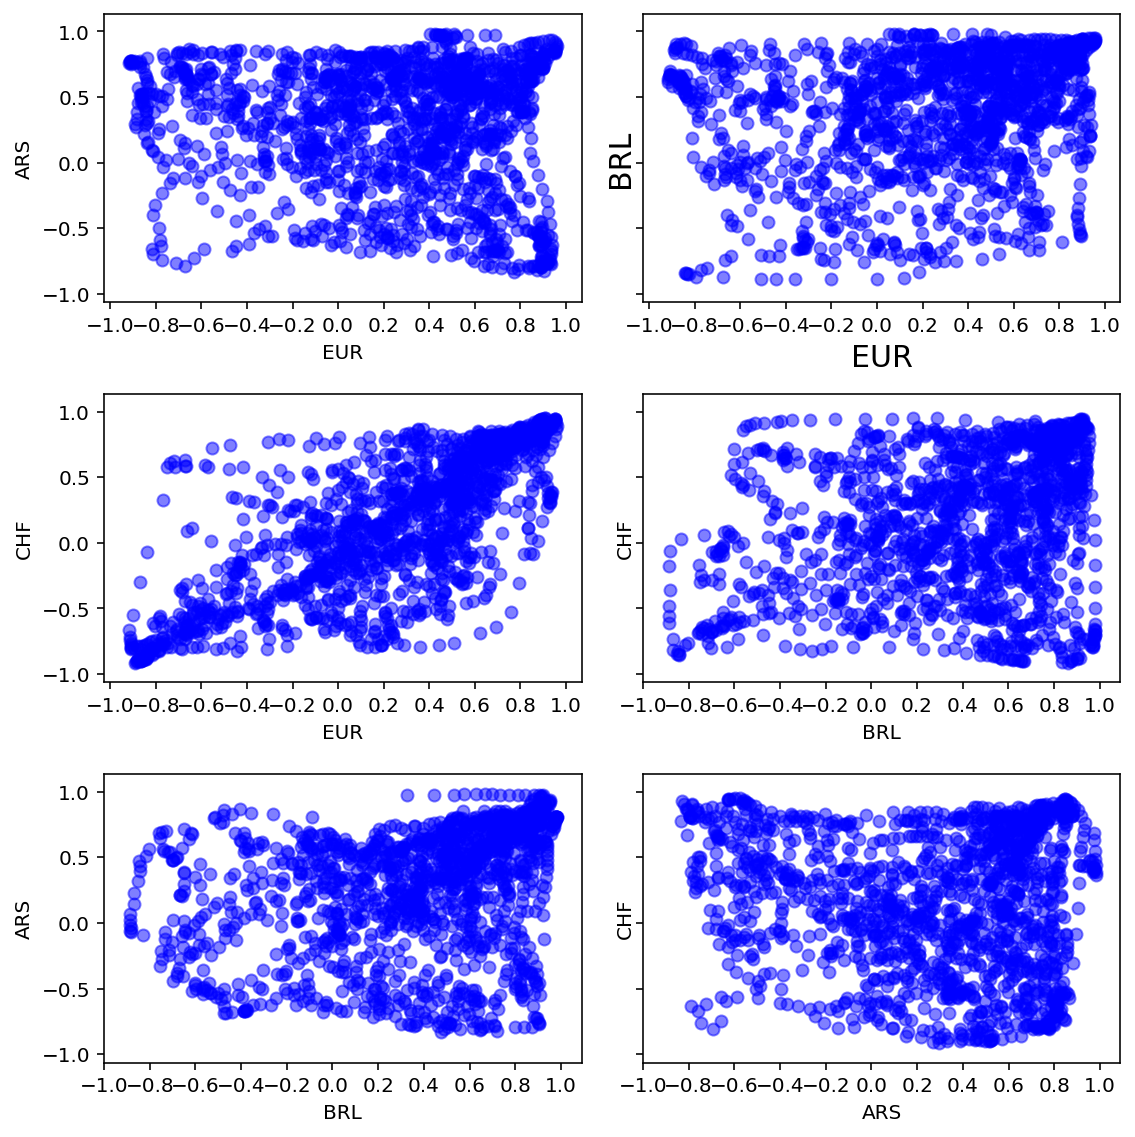

In [14]:
#EJERCICIO 5
%config InlineBackend.figure_format = "retina"
fig, axs = plt.subplots(3, 2, figsize=(8,8),sharey=True,tight_layout=True)

axs[0,0].scatter(correlacion["EUR"],correlacion["ARS"],c="blue",marker = 'o',alpha=.5)
axs[0,0].set(xlabel='EUR', ylabel='ARS')
axs[0,0].xaxis.set_ticks(np.arange(-1,1.2,.2))
axs[0,0].xaxis.get_label().set_fontsize(10)
axs[0,0].yaxis.get_label().set_fontsize(10)

axs[0,1].scatter(correlacion ["EUR"],correlacion["BRL"],c="blue",marker = 'o',alpha=.5)
axs[0,1].set(xlabel='EUR', ylabel='BRL')
axs[0,1].xaxis.set_ticks(np.arange(-1,1.2,.2))
axs[0,1].xaxis.get_label().set_fontsize(15)
axs[0,1].yaxis.get_label().set_fontsize(15)

axs[1,0].scatter(correlacion["EUR"],correlacion["CHF"],c="blue",marker = 'o',alpha=.5)
axs[1,0].set(xlabel='EUR', ylabel='CHF')
axs[1,0].xaxis.set_ticks(np.arange(-1,1.2,.2))
axs[1,0].xaxis.get_label().set_fontsize(10)
axs[1,0].yaxis.get_label().set_fontsize(10)

axs[1,1].scatter(correlacion["BRL"],correlacion["CHF"],c="blue",marker = 'o',alpha=.5)
axs[1,1].set(xlabel='BRL', ylabel='CHF')
axs[1,1].xaxis.set_ticks(np.arange(-1,1.2,.2))
axs[1,1].xaxis.get_label().set_fontsize(10)
axs[1,1].yaxis.get_label().set_fontsize(10)

axs[2,0].scatter(correlacion["BRL"],correlacion["ARS"],c="blue",marker = 'o',alpha=.5)
axs[2,0].set(xlabel='BRL', ylabel='ARS')
axs[2,0].xaxis.set_ticks(np.arange(-1,1.2,.2))
axs[2,0].xaxis.get_label().set_fontsize(10)
axs[2,0].yaxis.get_label().set_fontsize(10)

axs[2,1].scatter(correlacion["ARS"],correlacion["CHF"],c="blue",marker = 'o',alpha=.5)
axs[2,1].set(xlabel='ARS', ylabel='CHF')
axs[2,1].xaxis.set_ticks(np.arange(-1,1.2,.2))
axs[2,1].xaxis.get_label().set_fontsize(10)
axs[2,1].yaxis.get_label().set_fontsize(10)


plt.show()
